In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
import os

def consolidate_csv_files(folder_path):
    all_data = []  # List to hold data from all CSV files

    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            
            # Add a column with the filename as identifier
            file_name_without_extension = os.path.splitext(filename)[0]
            df['Combination'] = file_name_without_extension
            all_data.append(df)
            # df['SourceFile'] = filename
            # all_data.append(df)

    # Concatenate all dataframes
    combined_df = pd.concat(all_data, ignore_index=True)
    combined_df.rename(columns={"Index":"Graph_id"}, inplace=True)
    # combined_df.sort_values(by=['Combination', 'Graph_id'], inplace=True)
    combined_df.drop(['File'], axis=1, inplace=True)
    

    return combined_df

# Example usage
folder_path = '../data/direct_transitivity'
combined_df = consolidate_csv_files(folder_path)

# Now you can work with the combined_df DataFrame


In [4]:
combined_df.head()

,Graph_id,Nodes,Total Nodes,Butterflies,X-vars,C-vars,Total vars,Total constraints,Crossings,Opttime,Status,Nodes visited,Setup Time,Combination
0,0,10,12,0,8,7,15,20,0,0.000556,2,0,0.020,d_235689
1,1,13,13,0,6,2,8,8,0,0.000291,2,0,0.001,d_235689
2,2,10,10,0,15,0,15,40,0,0.000040,2,0,0.002,d_235689
3,3,11,18,0,15,12,27,36,0,0.002283,2,0,0.003,d_235689
4,4,12,16,0,12,11,23,30,0,0.000364,2,0,0.002,d_235689


In [6]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the column
combined_df['Combination_Encoded'] = label_encoder.fit_transform(combined_df['Combination'])

# combined_df
# print("Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
combined_df.head()


,Graph_id,Nodes,Total Nodes,Butterflies,X-vars,C-vars,Total vars,Total constraints,Crossings,Opttime,Status,Nodes visited,Setup Time,Combination,Combination_Encoded
0,0,10,12,0,8,7,15,20,0,0.000556,2,0,0.020,d_235689,298
1,1,13,13,0,6,2,8,8,0,0.000291,2,0,0.001,d_235689,298
2,2,10,10,0,15,0,15,40,0,0.000040,2,0,0.002,d_235689,298
3,3,11,18,0,15,12,27,36,0,0.002283,2,0,0.003,d_235689,298
4,4,12,16,0,12,11,23,30,0,0.000364,2,0,0.002,d_235689,298


## What is the time on average for each graph (from Graph Id) for all the combinations?


In [79]:
GroupedByGraphId = pd.DataFrame(combined_df.groupby(['Graph_id'])['Opttime'].mean().reset_index())

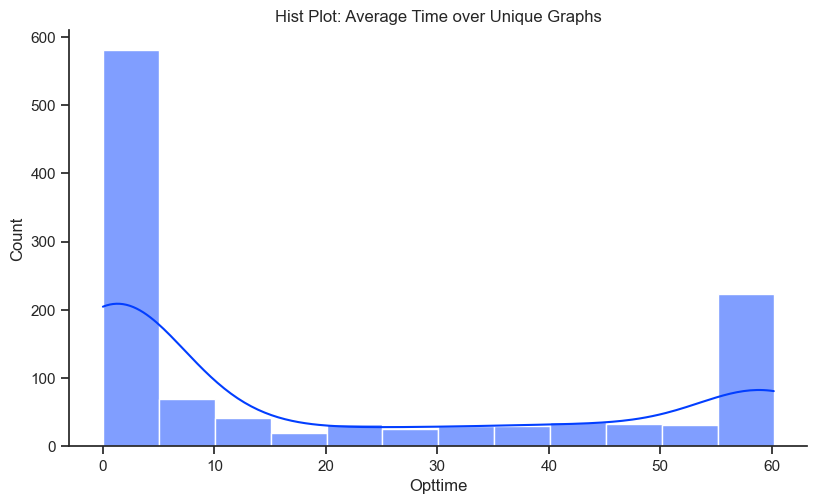

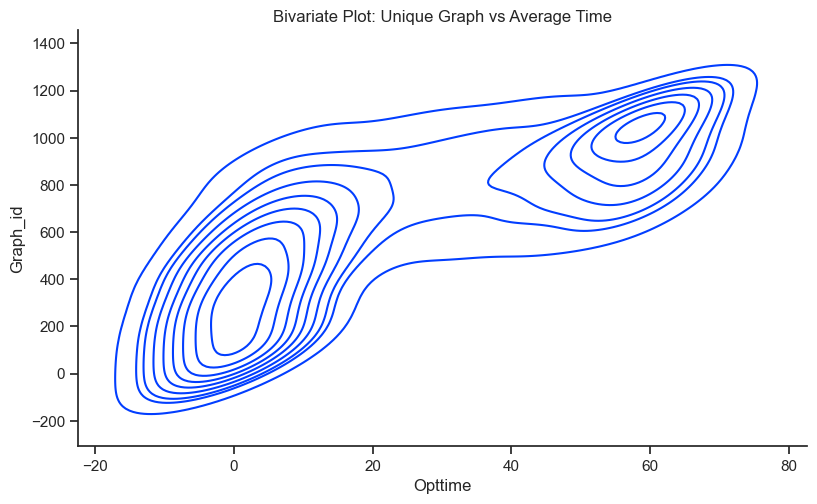

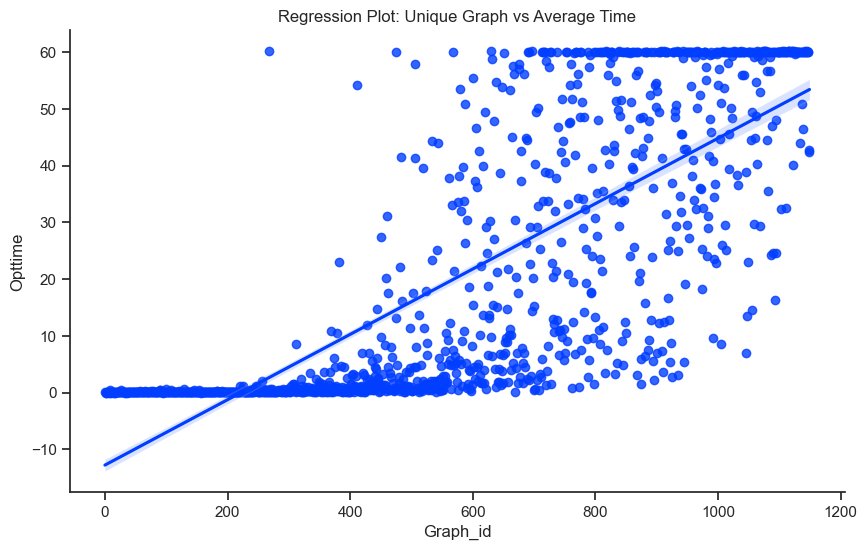

In [89]:
# Setting an appealing theme
sns.set_style("ticks")  # Other options: "dark", "white", "ticks"
sns.set_context("notebook")  # Other options: "paper", "notebook", "talk", "poster"
sns.set_palette("bright")  # Other options: "deep", "muted", "bright", "dark", "colorblind"
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False


# Histogram
sns.displot(GroupedByGraphId['Opttime'], kde=True, aspect=10/6)
plt.title('Hist Plot: Average Time over Unique Graphs')
plt.show()

# Bivariate distribution
sns.displot(GroupedByGraphId, x="Opttime", y="Graph_id", kind="kde", aspect=10/6)
plt.title('Bivariate Plot: Unique Graph vs Average Time')
plt.show()

# # Line Plot
# plt.figure(figsize=(10, 6))
# sns.lineplot(x="Graph_id", y="Opttime", data=GroupedByGraphId)
# plt.title('Line Plot: Unique Graph vs Average Time')
# plt.show()

# # Scatter Plot
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x="Graph_id", y="Opttime", data=GroupedByGraphId)
# plt.title('Scatter Plot: Unique Graph vs Average Time')
# plt.show()

# # Bar Plot
# plt.figure(figsize=(10, 6))
# sns.barplot(x="Graph_id", y="Opttime", data=GroupedByGraphId)
# plt.title('Bar Plot: Nodes vs Average Time')
# # plt.xticks(rotation=45)
# plt.xticks([])
# plt.show()

# Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(x="Graph_id", y="Opttime", data=GroupedByGraphId)
plt.title('Regression Plot: Unique Graph vs Average Time')
plt.show()


## What is the average time taken based on number of nodes in a graph?

In [61]:
GroupedByNodes = pd.DataFrame(combined_df.groupby(['Total Nodes'])['Opttime'].mean().reset_index())


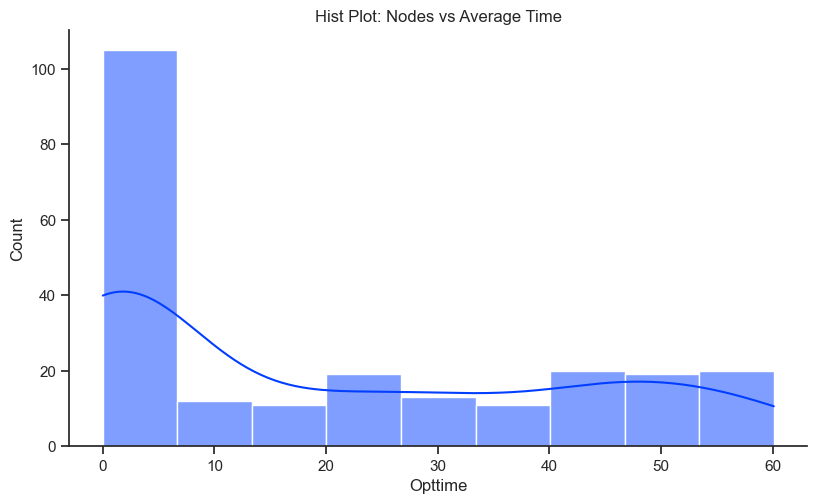

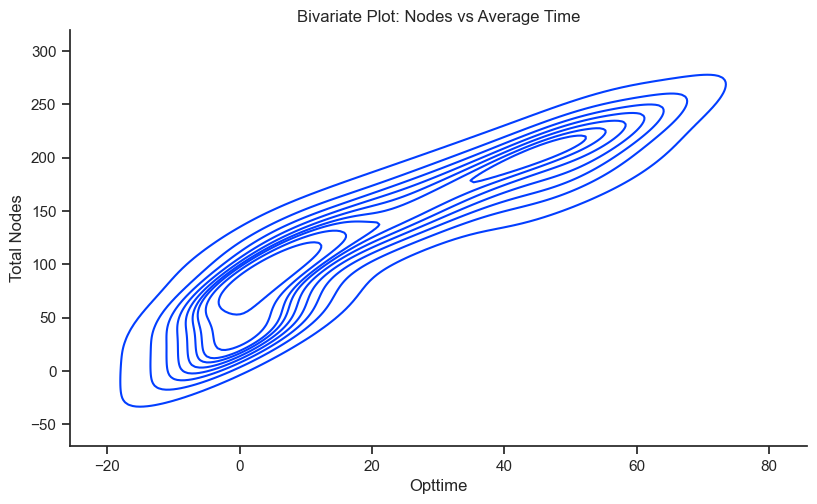

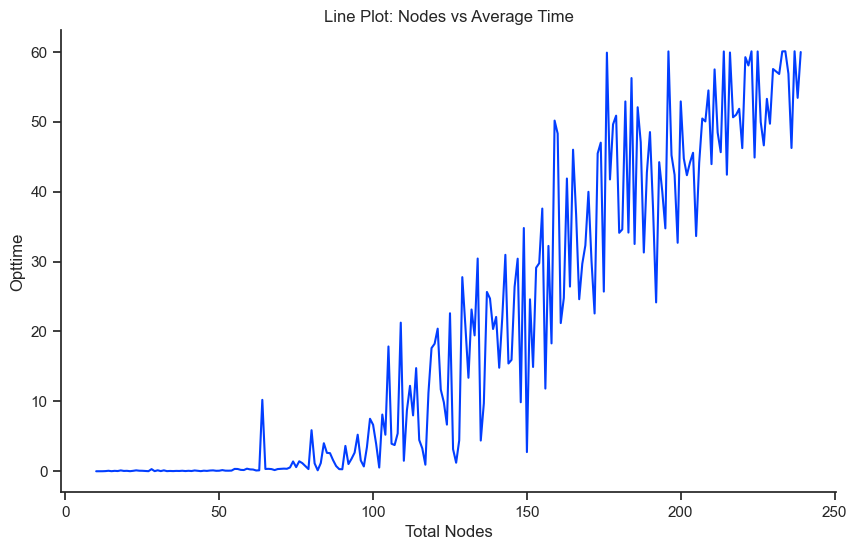

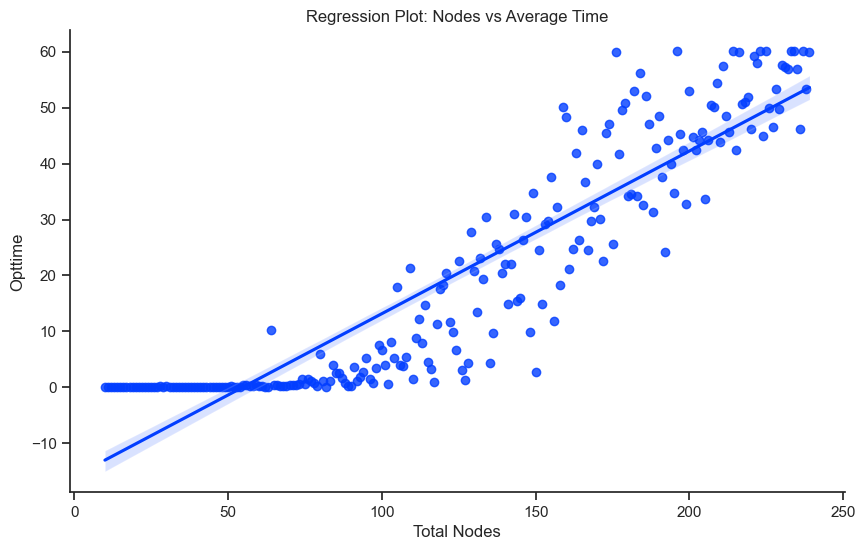

In [81]:


# Histogram
sns.displot(GroupedByNodes['Opttime'], kde=True, aspect=10/6)
plt.title('Hist Plot: Nodes vs Average Time')
plt.show()

# Bivariate distribution
sns.displot(GroupedByNodes, x="Opttime", y="Total Nodes", kind="kde", aspect=10/6)
plt.title('Bivariate Plot: Nodes vs Average Time')
plt.show()

# Line Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x="Total Nodes", y="Opttime", data=GroupedByNodes)
plt.title('Line Plot: Nodes vs Average Time')
plt.show()

# # Scatter Plot
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x="Total Nodes", y="Opttime", data=GroupedByNodes)
# plt.title('Scatter Plot: Nodes vs Average Time')
# plt.show()

# # Bar Plot
# plt.figure(figsize=(10, 6))
# sns.barplot(x="Total Nodes", y="Opttime", data=GroupedByNodes)
# plt.title('Bar Plot: Nodes vs Average Time')
# plt.xticks([])
# plt.show()

# Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(x="Total Nodes", y="Opttime", data=GroupedByNodes)
plt.title('Regression Plot: Nodes vs Average Time')
plt.show()


## What is the time on average for each combination for all the Graphs?


In [82]:
GroupedByCombination = pd.DataFrame(combined_df.groupby(['Combination_Encoded'])['Opttime'].mean().reset_index())


In [83]:
GroupedByCombination

,Combination_Encoded,Opttime
0,0,22.463389
1,1,15.659478
2,2,15.960603
3,3,16.441055
4,4,16.597222
...,...,...
507,507,21.918296
508,508,22.123533
509,509,22.641266
510,510,22.746301


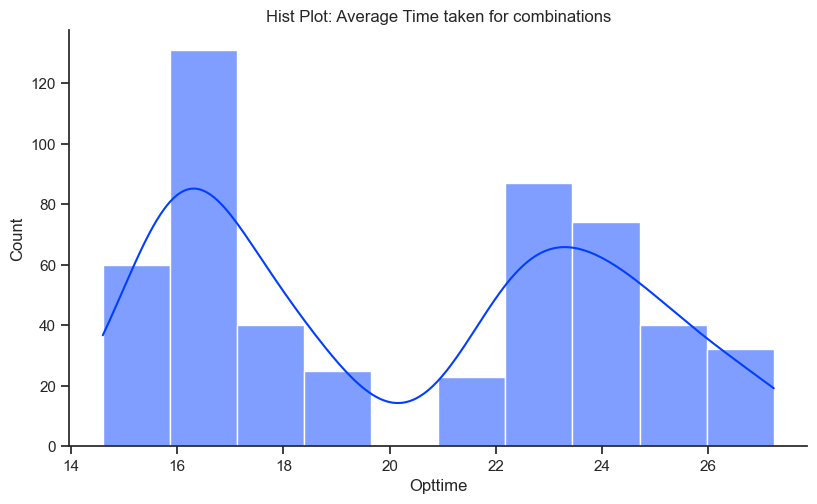

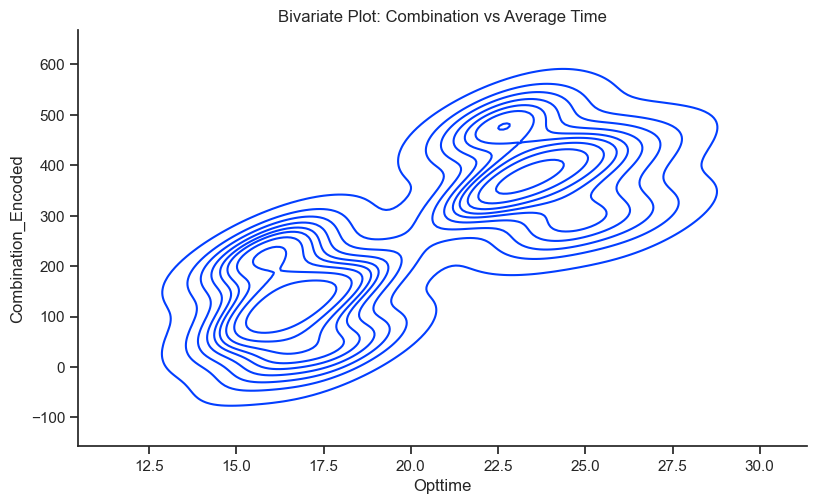

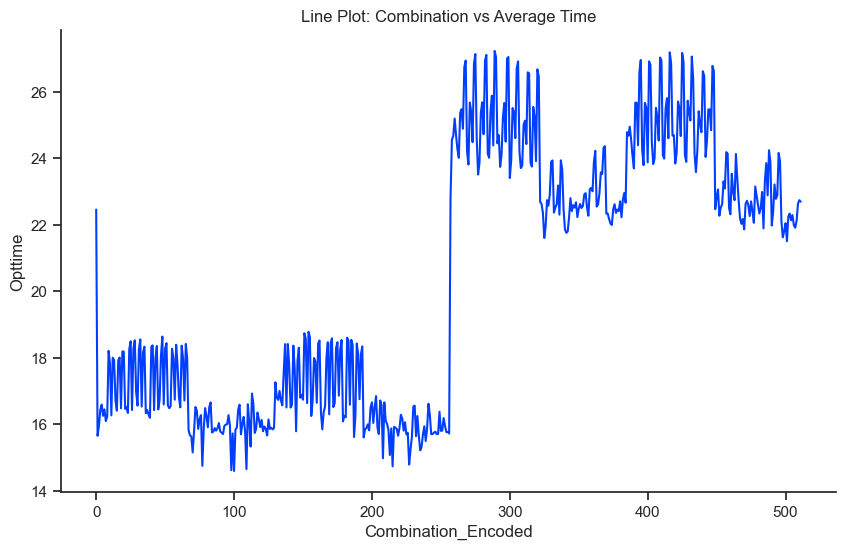

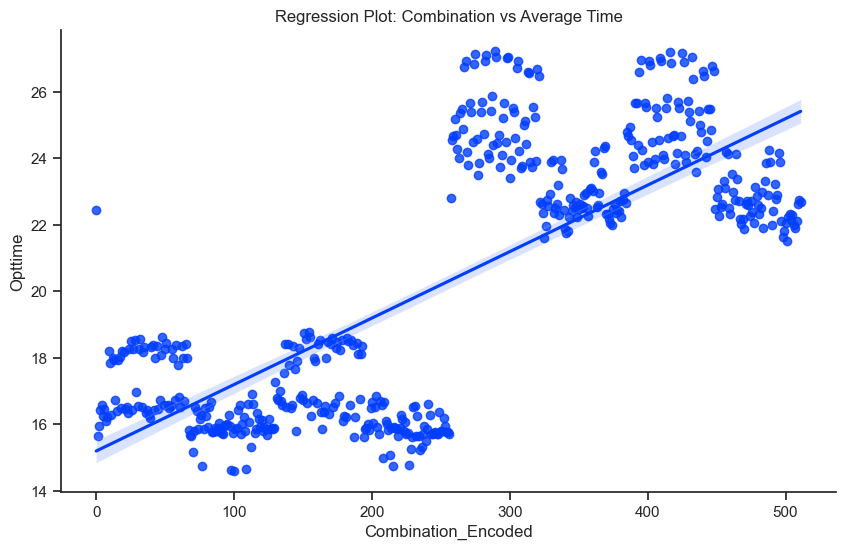

In [87]:


# Histogram
sns.displot(GroupedByCombination['Opttime'], kde=True, aspect=10/6)
plt.title('Hist Plot: Average Time taken for combinations')
plt.show()

# Bivariate distribution
sns.displot(GroupedByCombination, x="Opttime", y="Combination_Encoded", kind="kde", aspect=10/6)
plt.title('Bivariate Plot: Combination vs Average Time')
plt.show()

# Line Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x="Combination_Encoded", y="Opttime", data=GroupedByCombination)
plt.title('Line Plot: Combination vs Average Time')
plt.show()

# # Scatter Plot
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x="Combination_Encoded", y="Opttime", data=GroupedByCombination)
# plt.title('Scatter Plot: Combination vs Average Time')
# plt.show()

# # Bar Plot
# plt.figure(figsize=(10, 6))
# sns.barplot(x="Combination_Encoded", y="Opttime", data=GroupedByCombination)
# plt.title('Bar Plot: Combination vs Average Time')
# plt.xticks(rotation=45)
# plt.show()

# Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(x="Combination_Encoded", y="Opttime", data=GroupedByCombination)
plt.title('Regression Plot: Combination vs Average Time')
plt.show()
